klątwa wymiarowści
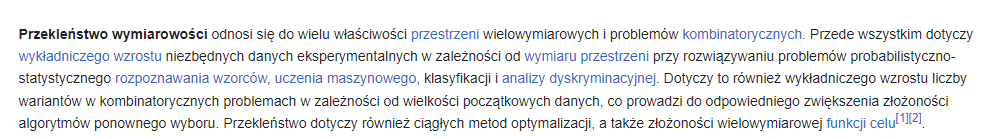
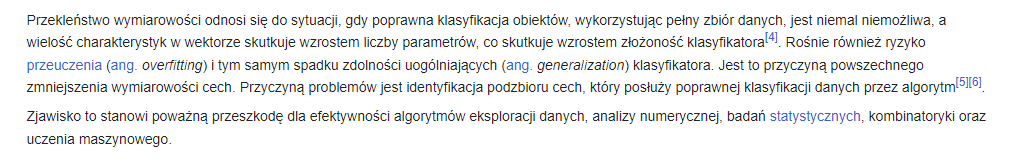
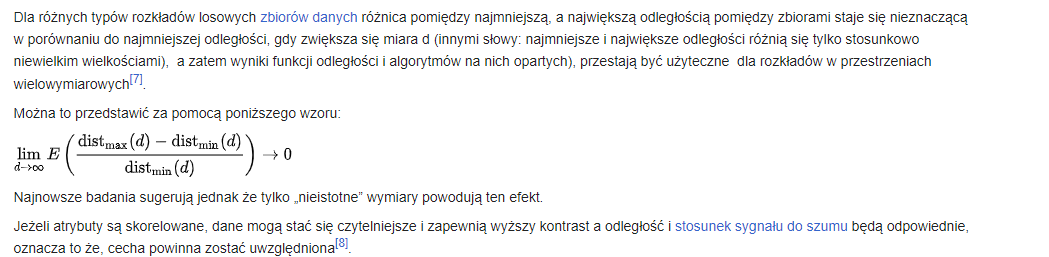

### PCA analiza głównych składowych 
Umożliwa identyfikacje wzorców na podstawie korelacji mniędzy cechami. Rzutuję się osie ortagonalne (prostopadłe do siebie) wariancji na nową przestrzeń z mnjnjeszą liczbą wymiraów.
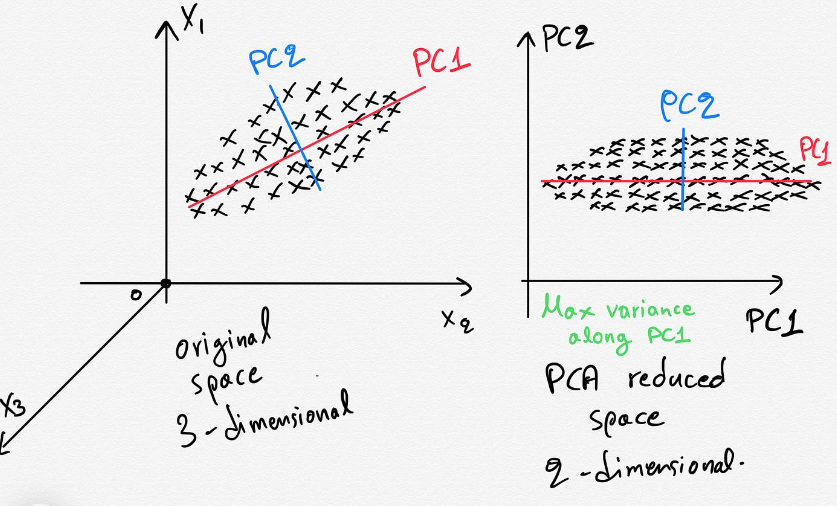
x1, x2, x3x to cechy a PC1 PC2 osie ortagonalne (główne składowe)
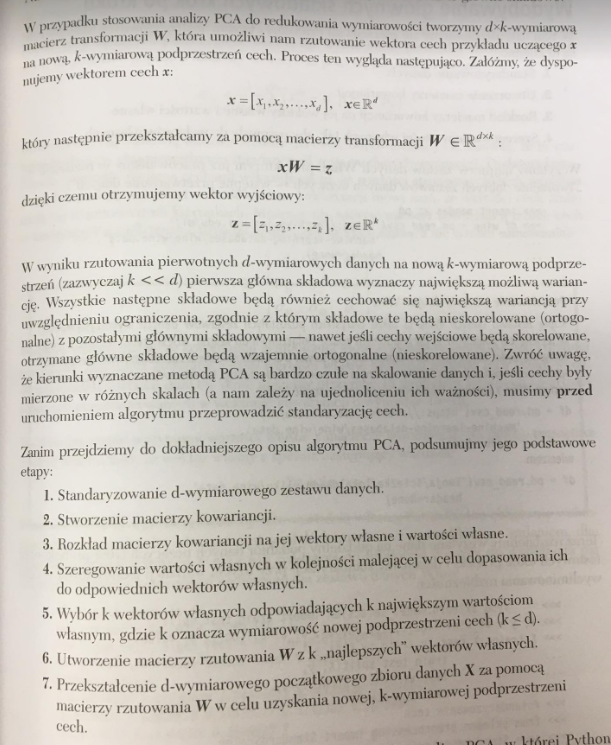
#### Tworzymy macierz która umożiliwa znalezienie wektora cech w nowej przestrzeni 
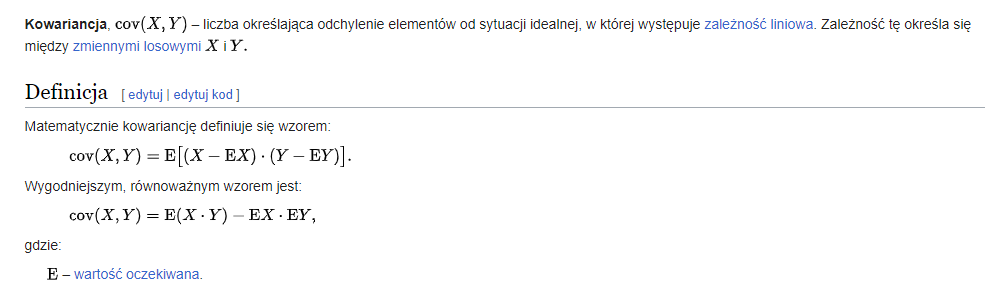

### Etapy wydobywania głównych składowch (osi oratgonalnych wariancji)
- Standaryzacja danych
- Utworznie macierzy kowariancji 
- Rozkład macierzy na wektory i wartość własne
- Szergowanie wektorów własnych tak żby pasowały do wratości własnych 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import danych 
df_wine = pd.read_csv("https://archive.ics.uci.edu/"
                     "ml/machine-learning-databases/"
                     "wine/wine.data",header=None)

df_wine.columns =["Etykieta klasy", "Alkohol","Kwas jabłkowy", "Popiół", "Zasadowość popiołu",
                 "Magnez","Całkowita zawartość fenoli", "Flawonoidy",
                 "Fenole nieflawoidowe", "Proantocjaniny", "Intesywność koloru", "Odcień",
                 "Transmiatncja 280/315 nm","Prolina"]
df_wine

Etykieta klasy  Alkohol  Kwas jabłkowy  Popiół  Zasadowość popiołu  \
0                 1    14.23           1.71    2.43                15.6   
1                 1    13.20           1.78    2.14                11.2   
2                 1    13.16           2.36    2.67                18.6   
3                 1    14.37           1.95    2.50                16.8   
4                 1    13.24           2.59    2.87                21.0   
..              ...      ...            ...     ...                 ...   
173               3    13.71           5.65    2.45                20.5   
174               3    13.40           3.91    2.48                23.0   
175               3    13.27           4.28    2.26                20.0   
176               3    13.17           2.59    2.37                20.0   
177               3    14.13           4.10    2.74                24.5   

     Magnez  Całkowita zawartość fenoli  Flawonoidy  Fenole nieflawoidowe  \
0       127                        2.80        3.06                  0.28   
1       100                        2.65        2.76                  0.26   
2       101                        2.80        3.24                  0.30   
3       113                        3.85        3.49                  0.24   
4       118                        2.80        2.69                  0.39   
..      ...                         ...         ...                   ...   
173      95                        1.68        0.61                  0.52   
174     102                        1.80        0.75                  0.43   
175     120                        1.59        0.69                  0.43   
176     120                        1.65        0.68                  0.53   
177      96                        2.05        0.76                  0.56   

     Proantocjaniny  Intesywność koloru  Odcień  Transmiatncja 280/315 nm  \
0              2.29                5.64    1.04                      3.92   
1              1.28                4.38    1.05                      3.40   
2              2.81                5.68    1.03                      3.17   
3              2.18                7.80    0.86                      3.45   
4              1.82                4.32    1.04                      2.93   
..              ...                 ...     ...                       ...   
173            1.06                7.70    0.64                      1.74   
174            1.41                7.30    0.70                      1.56   
175            1.35               10.20    0.59                      1.56   
176            1.46                9.30    0.60                      1.62   
177            1.35                9.20    0.61                      1.60   

     Prolina  
0       1065  
1       1050  
2       1185  
3       1480  
4        735  
..       ...  
173      740  
174      750  
175      835  
176      840  
177      560  

[178 rows x 14 columns]

#### 1. Dzielenie i standaryzacja danych 

In [3]:
# dzielenie na zbiory 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                                    stratify=y ,random_state=0)

In [5]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

#### 2. 3. Tworzenie macierzy kowariancji, Rozkład macierzy na wektory i wartość własne
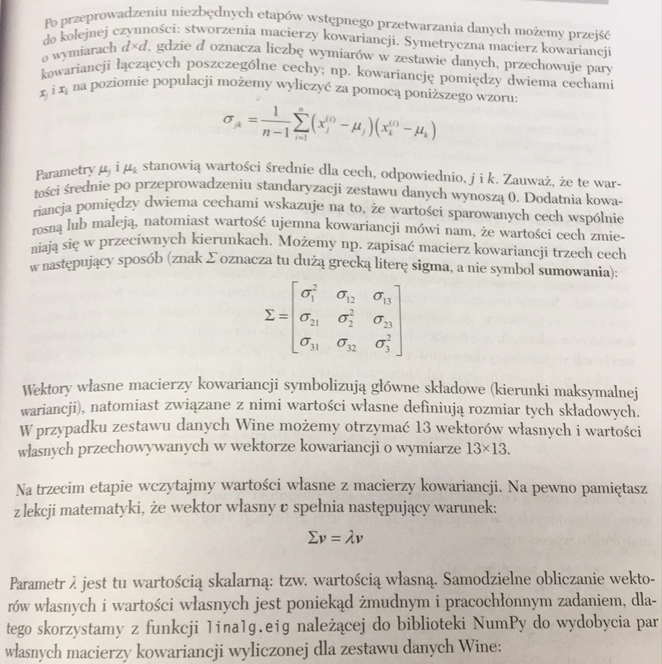

In [6]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


- np.cov - obliczył kowariancję ustandaryzowanego zestwu danych 
- np.lingla.eig - rozłożył macierz własną na 13-wym. wektor z wartościami własnymi (eigen_vals)
- eigen_vecs - macierz 13x13 przechowująca wektory własne w postaci kolumn  

#### Teraz trzeba wybrać najistotniejsze wektory wałsne (z najwieksza wariancją) i uszeregowac ich wratość własne od największego do najmniejszego. Rysowanie współczynnika wariancji wyjaśnionej 

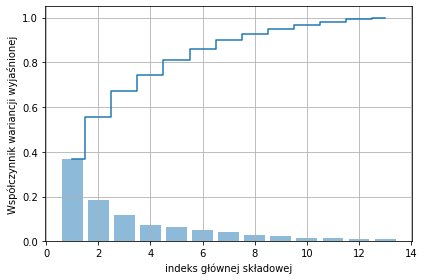

In [7]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align="center", label ="Pojedyncza wariancja wyjasniona")
plt.step(range(1,14), cum_var_exp, where="mid", label = "Łączna wariancja wyjasniona")

plt.ylabel("Współczynnik wariancji wyjaśnionej")
plt.xlabel("indeks głównej składowej")
plt.tight_layout()
plt.grid()
plt.show()

### Transformacja cech
#### Rzutowanie danych na inny wymiar
- wybranie k najistotnijesztch wektorów składowych 
- stworzenie macierzy W z k wektorów
- przekształcenie d-wymiarowego zestawu danych za pomocą macierzy W w celu uzyskania nowej k-wymiarowej przstrzeni(mniejsza ilość wymiarów)

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


#### Macierz z dwóch 13-wym największych wektorów własnych
mnożenie macierzy W przez cechy x dla uzyskania nowego dwu wymiarowego wektora

In [10]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

przekształćanie całego zestawu danych 124x13

In [11]:
X_train_pca = X_test_std.dot(w)

#### Wizualizacja przekształconego zestawu danych  124x2

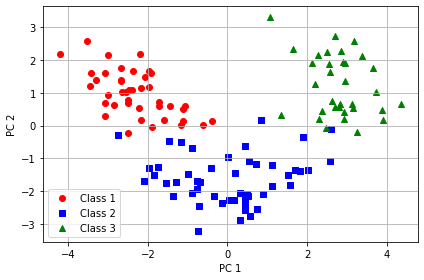

In [12]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()

#### dane zostały rozciągnięt w zdłuż osi x jak wzkauje na to wykres współczynników wariancji wyjaśnionej 

Algortym nie bedzie miał teraz problemu ze znaleźienim granic decyzyjnych 

### PCA w sklearn

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_ # najistotniejsze wektory 

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

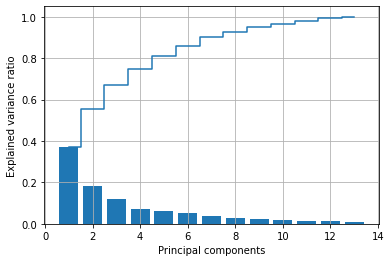

In [14]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.grid()
plt.show()

In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

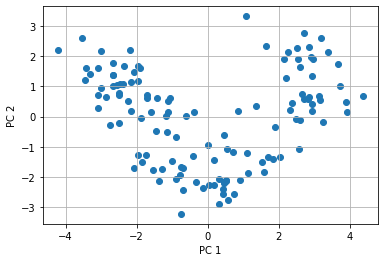

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid()
plt.show()

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [18]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

In [19]:
pca.explained_variance_ratio_

array([0.36951469, 0.18434927])

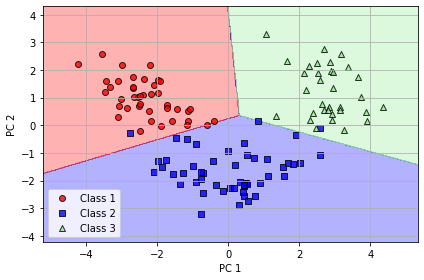

In [20]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()

#### Współczynniki wariancji wyjaśnionej dla różych głownych składowych(wariancji)

In [21]:
pca_ = PCA(n_components=None)
X_train_pca_ = pca_.fit_transform(X_train_std)
lr = lr.fit(X_train_pca_, y_train)

In [22]:
pca_.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

### Liniowa analiza dyskrinacyjna LDA
PCA od LDA rózni sie tym że LDA jest techniką uczenia nadzorowaną(PCA jest nienadzorowaną).Polega na wyznaczeniu rozkładu normalnego przykładów, przy założeniu że maja takie same macierze kowariancji i przykłady są od siebie niezależne. 
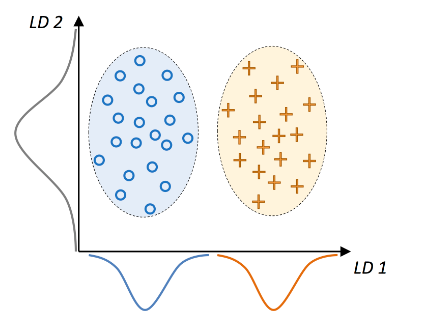
w zdłuż osi LD2 nie można stwierdzic które przykłady są istotniejsze 

### Etapy LDA:
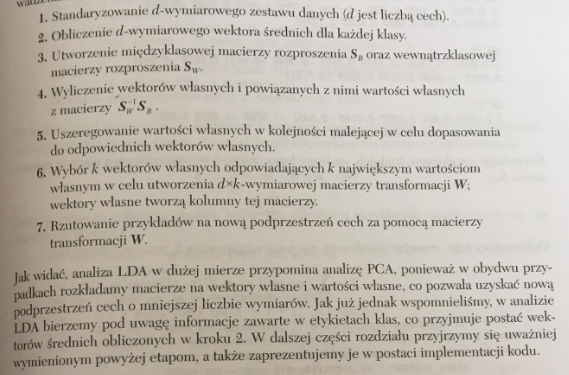
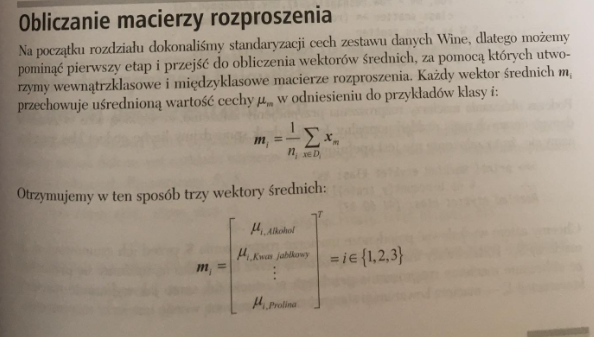

In [23]:
np.set_printoptions(precision=4)
mean_vec = []
for label in range(1,4):
    mean_vec.append(np.mean(X_train_std[y_train==label], axis=0))
    i = 1
    print("UW",(label, mean_vec[label-1]))

UW (1, array([ 0.9066, -0.3497,  0.3201, -0.7189,  0.5056,  0.8807,  0.9589,
       -0.5516,  0.5416,  0.2338,  0.5897,  0.6563,  1.2075]))
UW (2, array([-0.8749, -0.2848, -0.3735,  0.3157, -0.3848, -0.0433,  0.0635,
       -0.0946,  0.0703, -0.8286,  0.3144,  0.3608, -0.7253]))
UW (3, array([ 0.1992,  0.866 ,  0.1682,  0.4148, -0.0451, -1.0286, -1.2876,
        0.8287, -0.7795,  0.9649, -1.209 , -1.3622, -0.4013]))


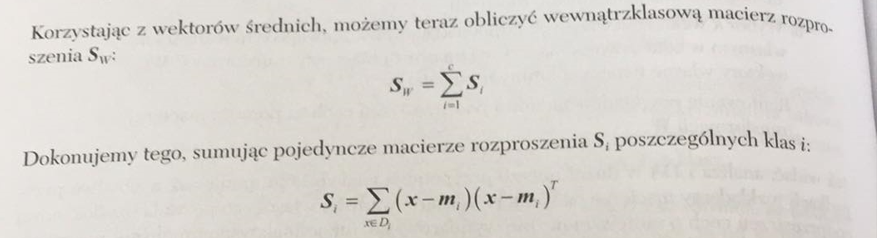

In [24]:
d = 13 # liczba cech
S_w = np.zeros((d,d))
for labem, mv in zip(range(1,4), mean_vec):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        
        class_scatter += (row-mv).dot((row-mv).T)
    S_w += class_scatter
print("Węwnątrzklasowa macierz rozproszenia",(S_w.shape[0], S_w.shape[1]))

Węwnątrzklasowa macierz rozproszenia (13, 13)


##### teraz trzeba sprawdzic czy etykiety mają rozkład normalny jeśli nie trzeba wyskalowac 

In [25]:
print("rozkład etykiet", np.bincount(y_train)[1:])

rozkład etykiet [41 50 33]


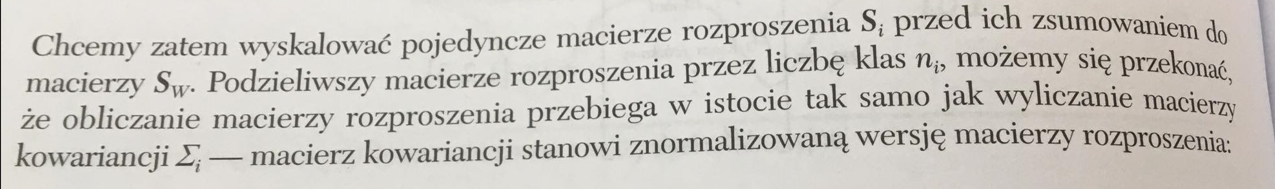
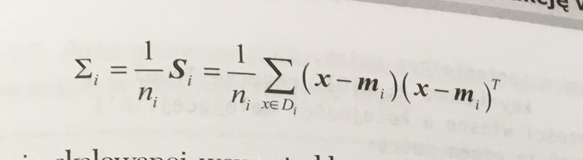

In [26]:
d = 13 # liczba cech
S_w = np.zeros((d,d))
for labem, mv in zip(range(1,4), mean_vec):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_w += class_scatter
print("Skalowana węwnątrzklasowa macierz rozproszenia",(S_w.shape[0], S_w.shape[1]))

Skalowana węwnątrzklasowa macierz rozproszenia (13, 13)


#### Oblicznie skalowanej wewnatrzklasowaj macierzy rozproszenia (macierzy kowariancji)
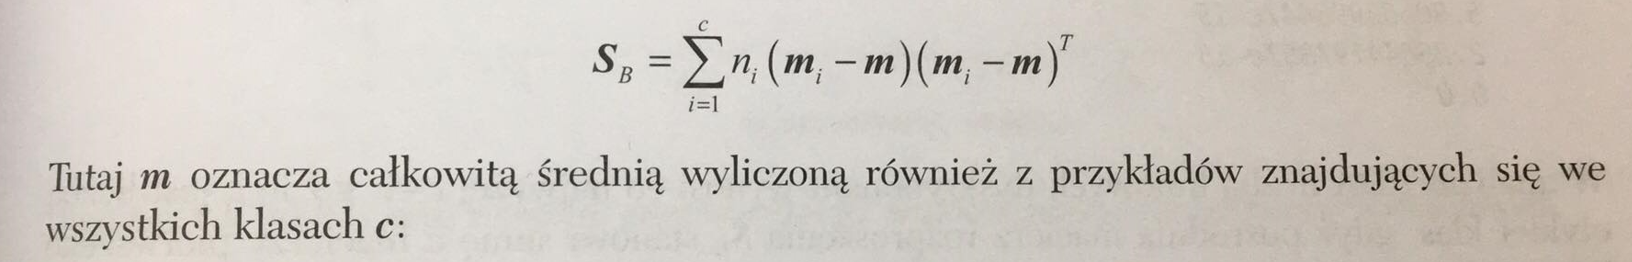

In [27]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # liczba cech
S_B = np.zeros((d,d))
for i, mean_vec_ in enumerate(mean_vec):
    n = X_train_std[y_train== i+1, :].shape[0]
    mean_vec_ = mean_vec_.reshape(d,1) # tworzy wektor kolumnowy 
    mean_overall = mean_overall.reshape(d,1)
    S_B += n*(mean_vec_- mean_overall).dot(
            (mean_vec_-mean_overall).T)
    
print("Węwnątrzklasowa macierz rozproszenia",(S_w.shape[0], S_w.shape[1]))

Węwnątrzklasowa macierz rozproszenia (13, 13)


###  Dobór dyskrymianotra 

In [28]:
# Macierze Sw^-1 * Sb
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_B))

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

3654.9396909113957
533.6199361212964
4.4342698246952023e-13
2.4233752429704626e-13
2.3735180487705065e-13
2.0250021635936492e-13
2.0250021635936492e-13
9.619409295438727e-14
9.619409295438727e-14
9.581323393379539e-14
3.460787842102467e-14
2.16434687166617e-14
2.16434687166617e-14


#### Otrzymujemy tylko 2 wardtości dodatnie klas 
teraz trzba narysowac wykres dla liniowych dyskrimantów (wektorów własnych). Inforamcje przenoszone przez wektory to ROZRÓŻNIALNOŚĆ!

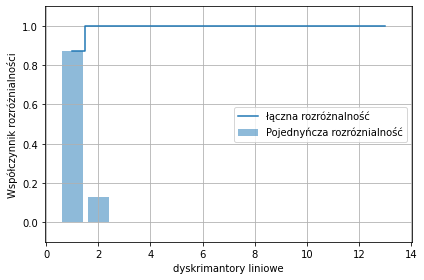

In [30]:
tot = sum(eigen_vals.real)
disc = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cun_dir = np.cumsum(disc)
plt.bar(range(1,14), disc, alpha=0.5, align="center", label="Pojednyńcza rozróznialność")
plt.step(range(1,14), cun_dir, where="mid", label="łączna rozróżnalność")
plt.ylabel("Współczynnik rozróżnialności")
plt.xlabel("dyskrimantory liniowe")
plt.ylim([-0.1,1.1])
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [31]:
# konstrukcja macierzy z 2 wektorów z największą rozróżnialnościa
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, 
              eigen_pairs[1][1][:, np.newaxis].real))
print("macierz W",w)

macierz W [[-0.0145  0.2117]
 [-0.008  -0.0632]
 [-0.0303  0.2565]
 [ 0.0584 -0.1366]
 [ 0.1227  0.0356]
 [ 0.1075  0.157 ]
 [-0.8519  0.1111]
 [-0.0865  0.1354]
 [ 0.1107 -0.4551]
 [ 0.0661  0.0181]
 [ 0.1159 -0.3163]
 [-0.3293 -0.3468]
 [-0.3117  0.6184]]


#### Rzutowanie przykładów na nową przestrzeń           X'=XW

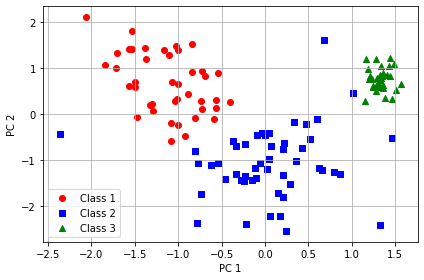

In [32]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], 
                X_train_lda[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()

### Implemantacja w scikit-learn

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [34]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train) # nadzorowane wiec trzeba podac labelki 


In [35]:
lr = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=1)
lr.fit(X_train_lda, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

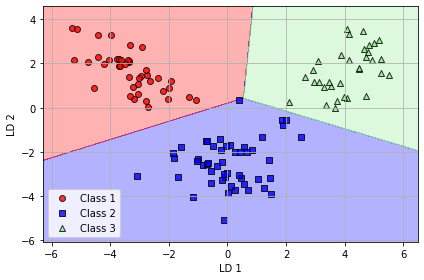

In [36]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()

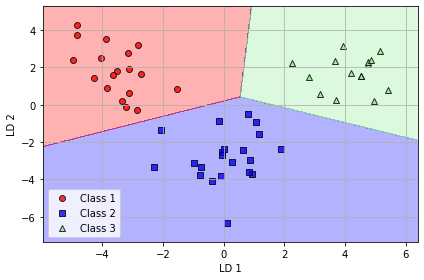

In [37]:
# TESTOWANIE 
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid()
plt.show()

In [38]:
pred = lr.predict(X_test_lda)

In [39]:
y_test

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)

In [41]:
acc

1.0

#### Nie potrzeba wszyskiech 13 cech żeby algortym okreslił klasy próbek !

### Jądrowa analiza głównych skałdowych KPCA
#### Rzutowanie danych nierozdzielnych liniowo na mniejsza ilość wymiarów. W analizie KPCA przykłady są już zrzutowane na odpowiednią podprzestrzeń wektorów włsanych, a w standartowej analizie PCA trzeba utrzorzyć mazierz transformaji.
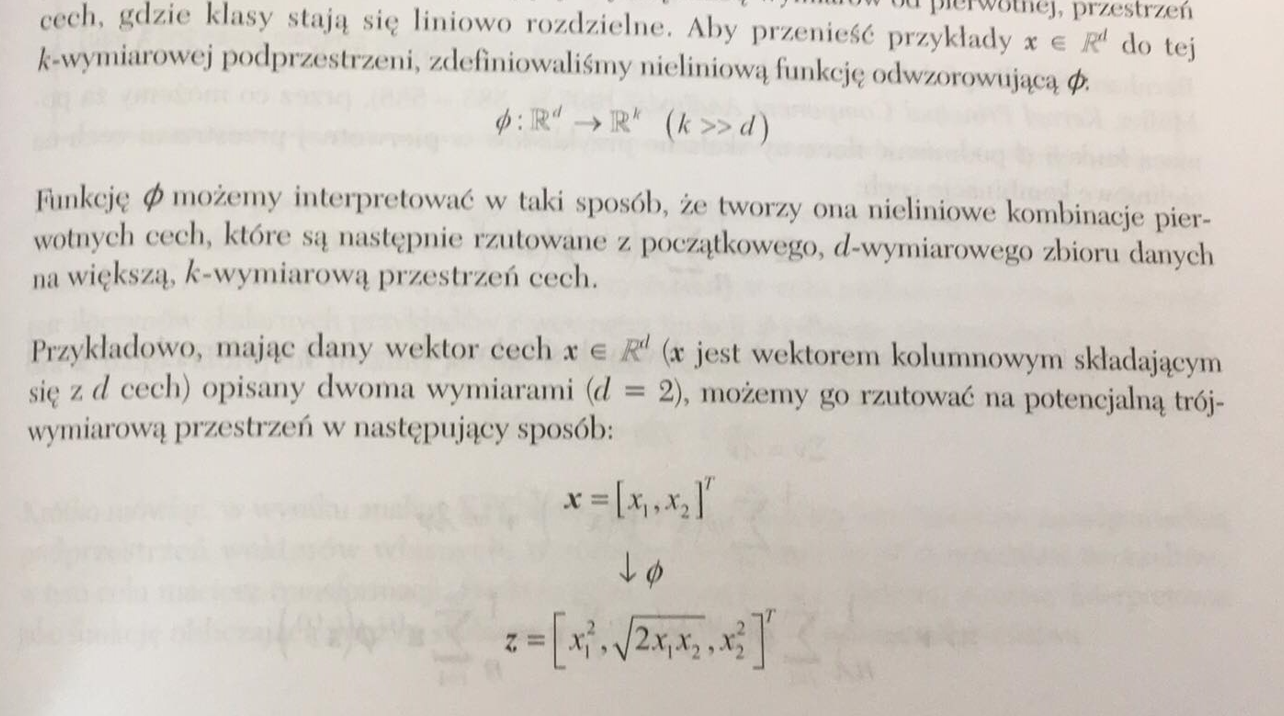
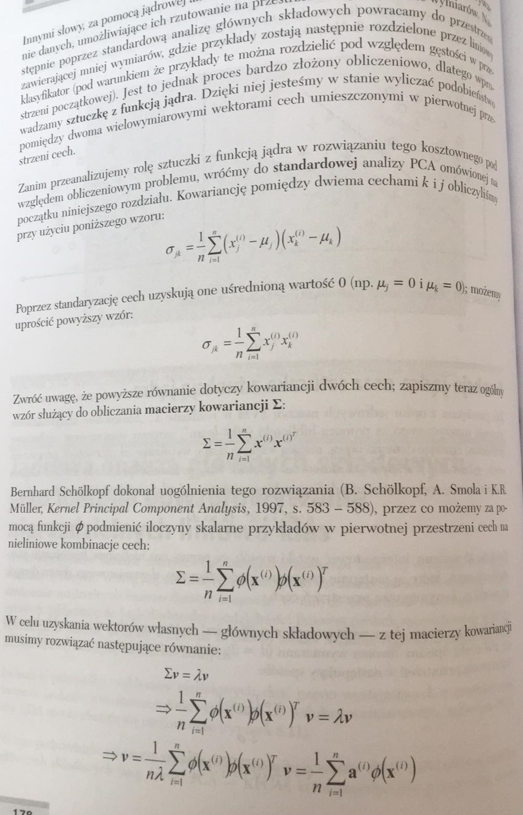
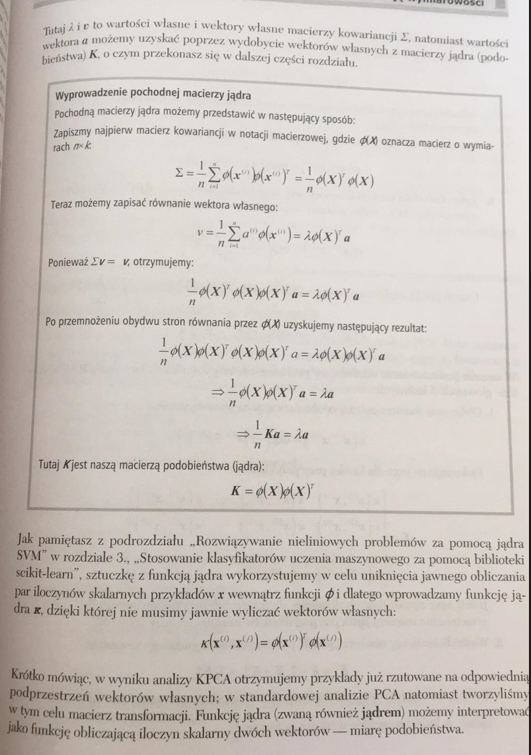
### Rodzaje funkcji jądrowych 
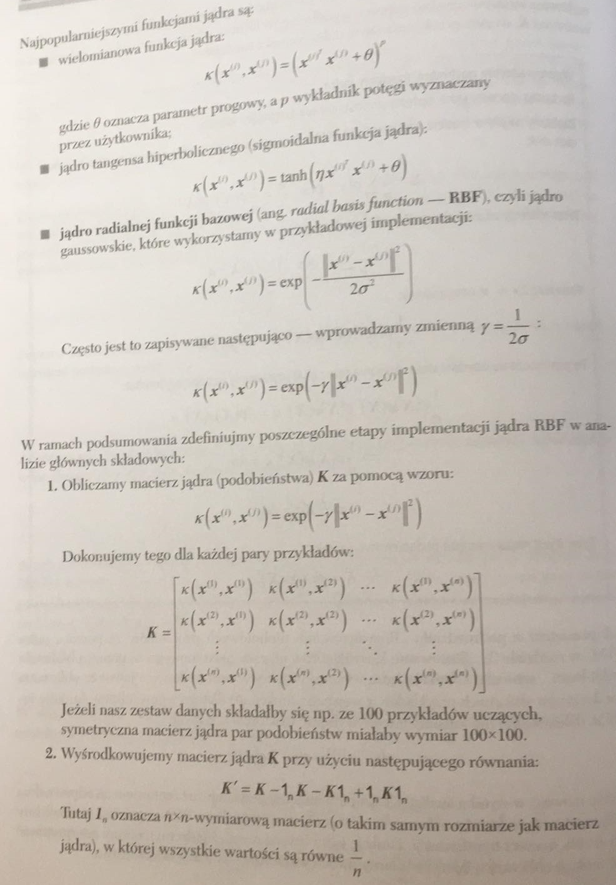
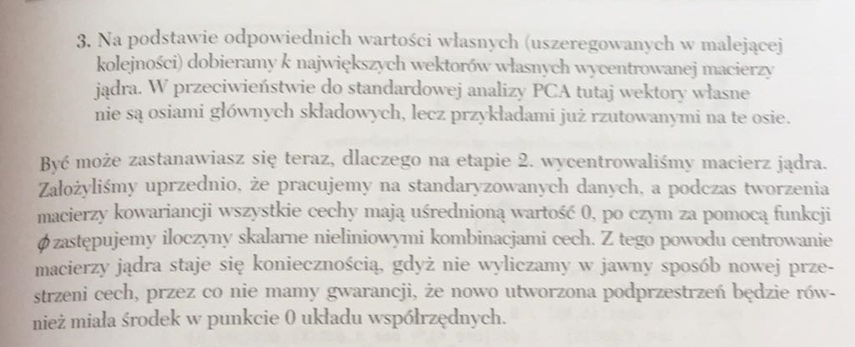

Implemantacja KPCA z jądrem gausowskim RBF

In [42]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    
    ''' 
    Parametry:
    
    X :{ndarray}, wymiary = [n_przykładów, n_cech]
    gamma: liczby zmiennoprzecinkowe, parametr jądra RBF
    n_components: liczby całkowite: liczba zwracanych głównych składowych 
    
    
    Zwraca:
    
    X_pc: {ndarray}, wymiary =[n_przykładów, n_cehc]
    Rzutowany zestaw danych 
    
    '''
    global eigvals
    # oblicza kwadaraty odlwgłości par
    #dane o rozmizrze MxN
    sq_dists = pdist(X,"sqeuclidean")
    
    # przekształca wyliczone wartości na macierz kwadratową
    mat_sq_dists = squareform(sq_dists)
    
    #oblicza symatryczną macierz jądra 
    K = exp(-gamma*mat_sq_dists)
    
    #centruje macierz jądra 
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K- one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #wydobywa pary własne z centrowanej macierzy jądra
    # scipy.linalg.eigh zwaraca je w kolejności rosnącej
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    #wybiera k najwiekszych wektorów własnych 
    X_pc = np.column_stack(eigvecs[:,i] for i in range(n_components))
    
    return X_pc

dataset zawiera dwuwymiarowy zestaw z 100 przykładami 

In [43]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, random_state=123)

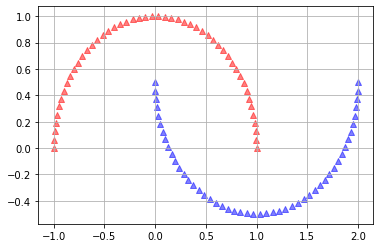

In [44]:
plt.scatter(X[y==0,0], X[y==0,1],# bierze współrzedną X[0] wszedzie tam gdzie y=0
           color="red", marker="^", alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1,1], color="blue", marker="^", alpha=0.5)
plt.grid()
plt.show()

In [45]:
# standartow analiza PCA

from sklearn.decomposition import PCA


In [46]:
s_pca = PCA(n_components=2)
X_spca = s_pca.fit_transform(X)


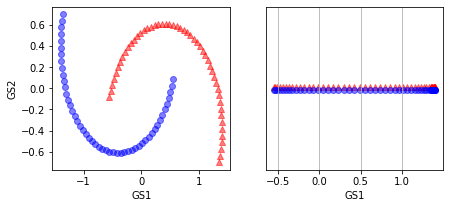

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02,
             color="red", marker="^", alpha=0.5)
ax[1].scatter(X_spca[y==0,0],  np.zeros((50,1))-0.02,
             color="blue", marker="o", alpha=0.5)
ax[0].set_xlabel("GS1")
ax[0].set_ylabel("GS2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("GS1")
plt.grid()
plt.show()

klasyfitator PCA ma problemy z rozróżnieniem klas bo sa nielinowe a w osi pionowej nakładają sie na siebie 

##### KPCA

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\477385023.py:31: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma*mat_sq_dists)
C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\477385023.py:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack(eigvecs[:,i] for i in range(n_components))


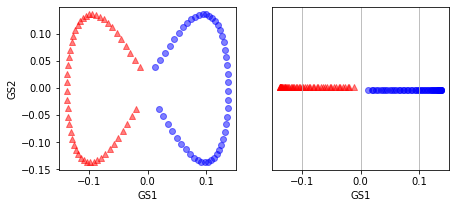

In [48]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2) # gamme dobieramy metodą prób i błędów 
# wskazówki doboru gammy w rozdziale 6.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02,
             color="red", marker="^", alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],  np.zeros((50,1))-0.02,
             color="blue", marker="o", alpha=0.5)
ax[0].set_xlabel("GS1")
ax[0].set_ylabel("GS2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("GS1")
plt.grid()
plt.show()

#####  Dane zostały idealnie rozdielone liniowo, dobry datatset do uczenia !!

In [49]:
#### KOLEJNY PRZYKŁAD ####
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

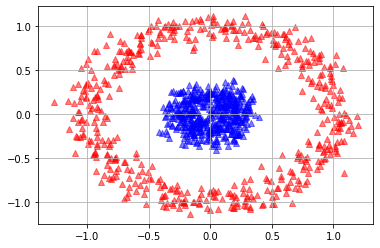

In [50]:
plt.scatter(X[y==0,0], X[y==0,1], 
           color="red", marker="^", alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1],
           color="blue", marker="^", alpha=0.5)
plt.grid()
plt.show()

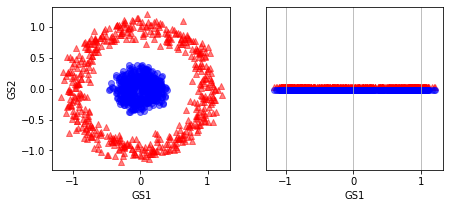

In [51]:
X_spca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((500,1))+0.02,
             color="red", marker="^", alpha=0.5)
ax[1].scatter(X_spca[y==0,0],  np.zeros((500,1))-0.02,
             color="blue", marker="o", alpha=0.5)
ax[0].set_xlabel("GS1")
ax[0].set_ylabel("GS2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("GS1")
plt.grid()
plt.show()

Zwyczajna analiza PCA sobie nie radzi 

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\477385023.py:31: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma*mat_sq_dists)
C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\477385023.py:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack(eigvecs[:,i] for i in range(n_components))


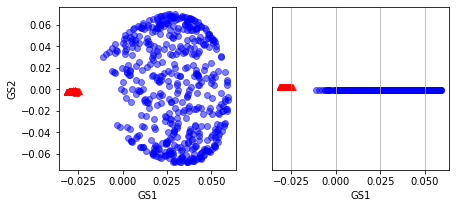

In [52]:
#### KPCA ####
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2) # gamme dobieramy metodą prób i błędów 
# wskazówki doboru gammy w rozdziale 6.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1],
             color="red", marker="^", alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1],
             color="blue", marker="o", alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02,
             color="red", marker="^", alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],  np.zeros((500,1))-0.02,
             color="blue", marker="o", alpha=0.5)
ax[0].set_xlabel("GS1")
ax[0].set_ylabel("GS2")

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel("GS1")
plt.grid()
plt.show()

Idealnie rozdzielne liniowo 

### Rzutowanie nowych punktów danych 
#### Ważne! Ten algortym pozwala na rzutwoanie nowych danych na nową przestrzeń bez końeczności powonego uczenia modelu.
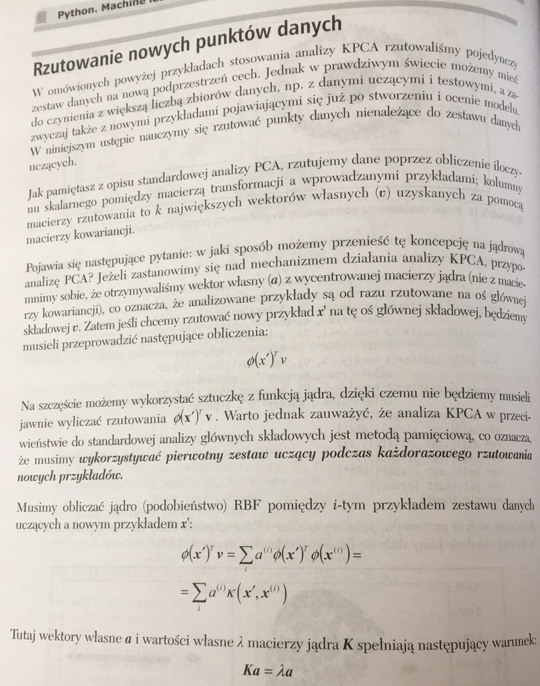

In [53]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    
    ''' 
    Parametry:
    
    X :{ndarray}, wymiary = [n_przykładów, n_cech]
    gamma: liczby zmiennoprzecinkowe, parametr jądra RBF
    n_components: liczby całkowite: liczba zwracanych głównych składowych 
    
    
    Zwraca:
    
    Alphas: {ndarray}, wymiary =[n_przykładów, n_cehc]
    Rzutowany zestaw danych 
    
    lambdas: lista
    Wartości własne 
    '''
    global eigvals
    # oblicza kwadaraty odlwgłości par
    #dane o rozmizrze MxN
    sq_dists = pdist(X,"sqeuclidean")
    
    # przekształca wyliczone wartości na macierz kwadratową
    mat_sq_dists = squareform(sq_dists)
    
    #oblicza symatryczną macierz jądra 
    K = exp(-gamma*mat_sq_dists)
    
    #centruje macierz jądra 
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K- one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #wydobywa pary własne z centrowanej macierzy jądra
    # scipy.linalg.eigh zwaraca je w kolejności rosnącej
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    #wybiera k najwiekszych wektorów własnych 
    aplhas = np.column_stack(eigvecs[:,i] for i in range(n_components))
    
    #wybiera odpowiednie wartości własne 
    lambadas = [eigvals[i] for i in range(n_components)]
    
    return aplhas, lambadas

In [55]:
X,y = make_moons(n_samples=100, random_state=123)
aplhas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\667942505.py:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma*mat_sq_dists)
C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_19280\667942505.py:46: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  aplhas = np.column_stack(eigvecs[:,i] for i in range(n_components))


In [56]:
### ZAKLADNIE NOWYCH 26 PUNKTÓW DO RZUTOWANIA ###

x_new = X[26]
x_new

array([ 1.6235, -0.2818])

In [57]:
x_proj = aplhas[25]
x_proj

array([0.0788])

In [58]:
def project_x(x_new, X, gamm, alphas, lambadas):
    pair_dist = np.array([np.sum(x_new-row)**2 for row in X])
    k = np.exp(-gamm * pair_dist)
    return k.dot(alphas/lambadas)

In [60]:
x_reproj = project_x(x_new, X, gamm=15, alphas=aplhas, lambadas=lambdas)

In [61]:
x_reproj

array([-0.1841])

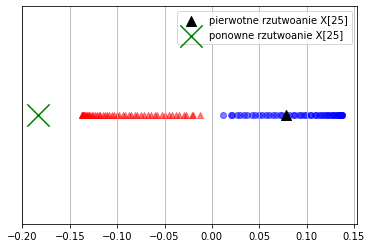

In [63]:
plt.scatter(aplhas[y==0, 0], np.zeros((50)), color="red", marker="^", alpha=0.5)
plt.scatter(aplhas[y==1, 0], np.zeros((50)), color="blue", marker="o", alpha=0.5)
plt.scatter(x_proj,0, color="black",label="pierwotne rzutwoanie X[25]" ,marker="^", s=100)
plt.scatter(x_reproj,0, color="green",label="ponowne rzutwoanie X[25]" ,marker="x", s=500)
plt.yticks([],[])
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [64]:
### w scikit learn
from sklearn.decomposition import KernelPCA

kernel_pca  = KernelPCA(n_components=2, kernel="rbf", gamma=15)


In [65]:
kernel = kernel_pca.fit_transform(X)

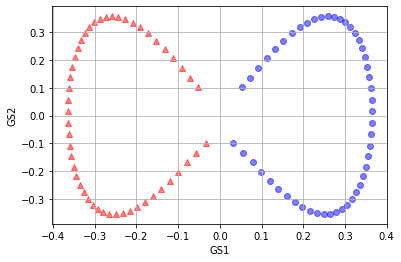

In [66]:
plt.scatter(kernel[y==0, 0], kernel[y==0, 1], color="red", marker="^", alpha=0.5)
plt.scatter(kernel[y==1, 0], kernel[y==1, 1], color="blue", marker="o", alpha=0.5)
plt.xlabel("GS1")
plt.ylabel("GS2")
plt.grid()
plt.show()